In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bitcoin-dataset/bitcoin.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/bitcoin-dataset/bitcoin.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [4]:
df.shape

(2713, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2713 non-null   object 
 1   Open       2713 non-null   float64
 2   High       2713 non-null   float64
 3   Low        2713 non-null   float64
 4   Close      2713 non-null   float64
 5   Adj Close  2713 non-null   float64
 6   Volume     2713 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 148.5+ KB


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2.713000e+03
mean,11311.041069,11614.292482,10975.555057,11323.914637,11323.914637,1.470462e+10
std,16106.428891,16537.390649,15608.572560,16110.365010,16110.365010,2.001627e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,606.396973,609.260986,604.109985,606.718994,606.718994,7.991080e+07
50%,6301.569824,6434.617676,6214.220215,6317.609863,6317.609863,5.098183e+09
75%,10452.399414,10762.644531,10202.387695,10462.259766,10462.259766,2.456992e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [7]:
# Checking for the missing values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# EDA Part

In [8]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


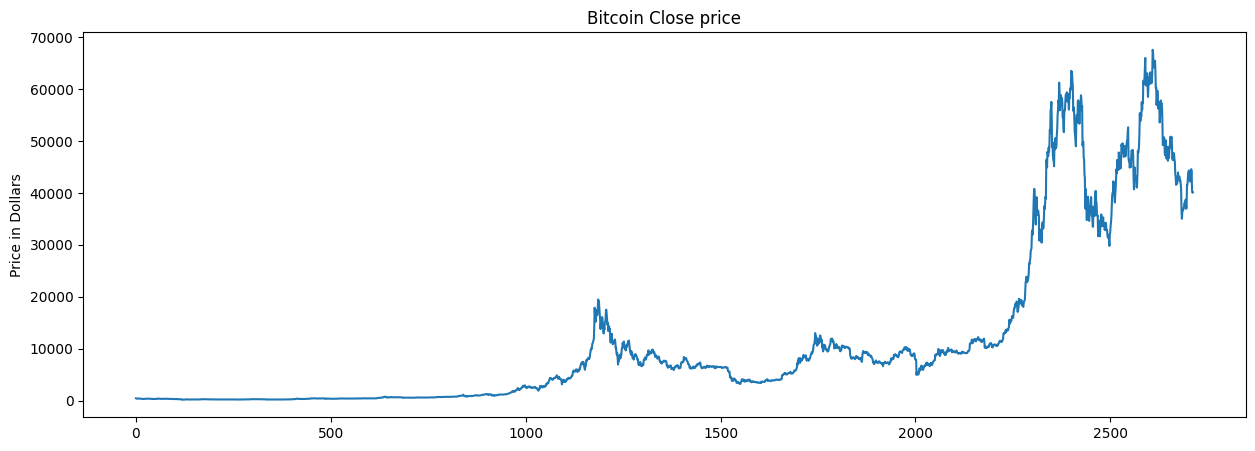

In [9]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Bitcoin Close price')
plt.ylabel('Price in Dollars')
plt.show()

In [10]:
# In the data the price if `Close` and Adj `Close` are same.
df[df['Close'] == df['Adj Close']].shape, df.shape

((2713, 7), (2713, 7))

In [11]:
df = df.drop('Adj Close',axis=1)

In [12]:
import warnings
warnings.filterwarnings('ignore')

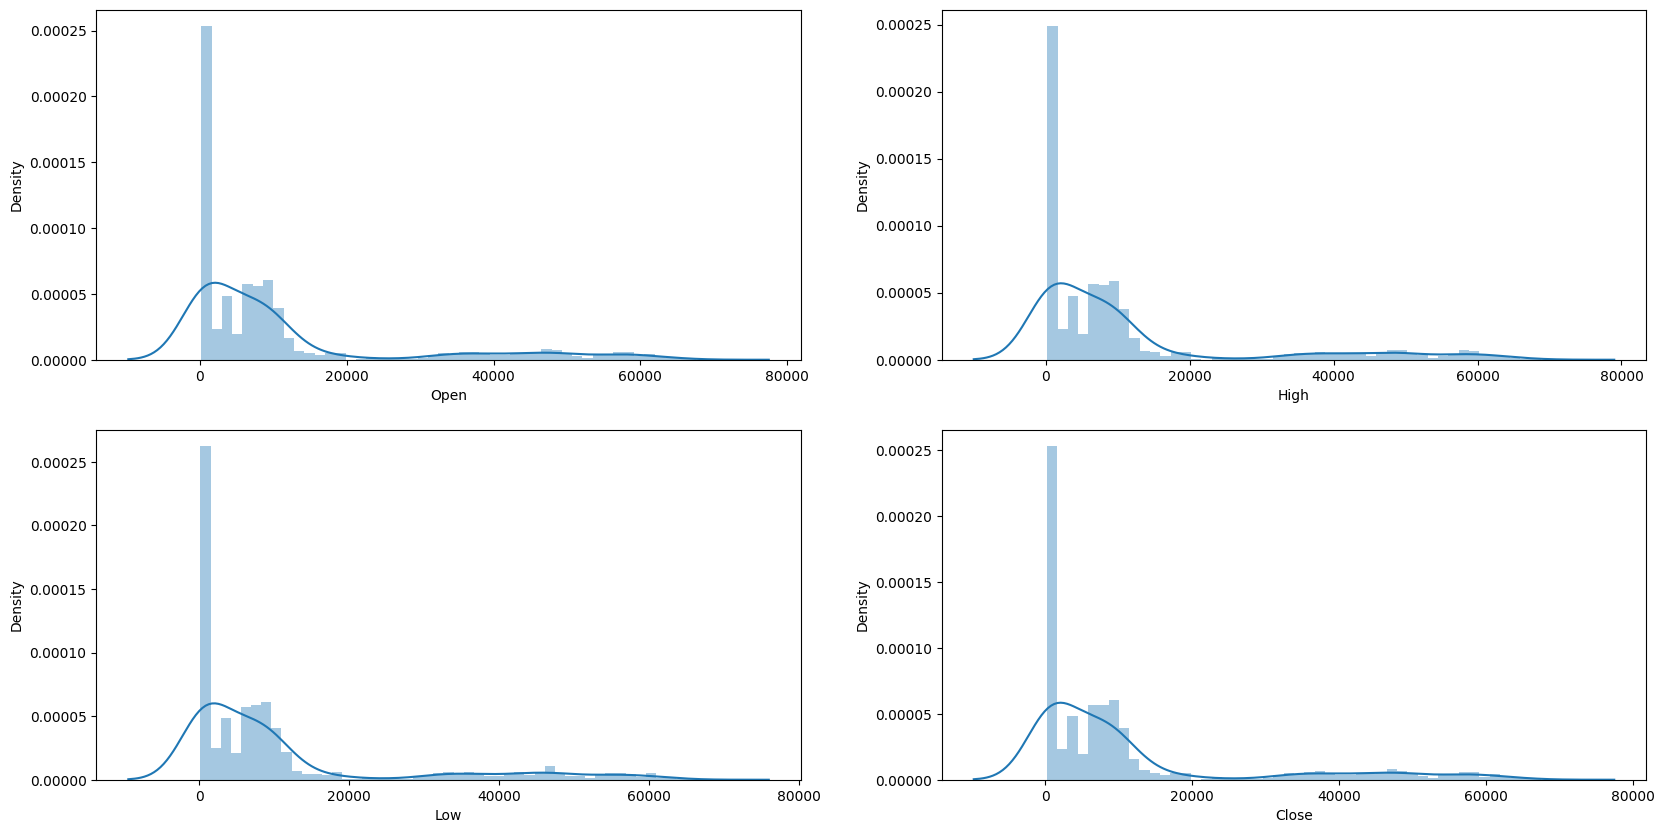

In [13]:
features = ['Open','High','Low','Close']
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,2,i+1)
    sns.distplot(df[col])
plt.show()

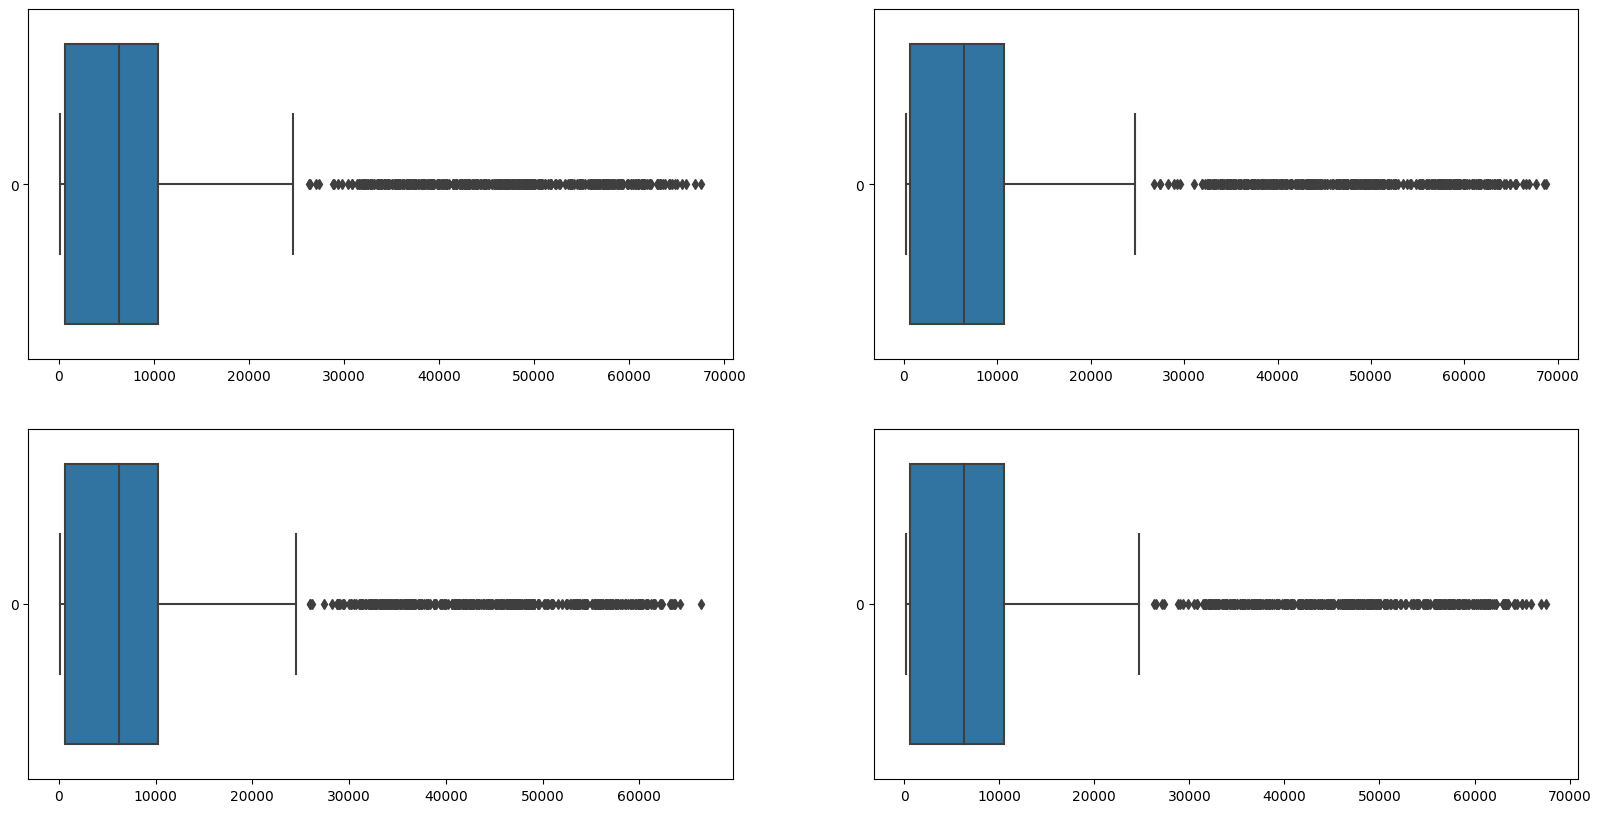

In [14]:
features = ['Open','High','Low','Close']
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,2,i+1)
    sns.boxplot(df[col],orient='h')
plt.show()

### Probleam: We can see in the barplot that there is so many outliers in the data, which means that the prices of the stock have varied hugely in a very short period of time. 

# Feature Engineering

In [15]:
df.sample()

,Date,Open,High,Low,Close,Volume
667,2016-07-15,659.171021,667.077026,659.039978,663.255005,81673104


In [16]:
date = df['Date'].str.split('-',expand=True)
df['year'] = date[0].astype(int)
df['month'] = date[1].astype(int)
df['day'] = date[2].astype(int)

In [17]:
# Convert Date into datetime object
df['Date'] = pd.to_datetime(df['Date'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2713 non-null   datetime64[ns]
 1   Open    2713 non-null   float64       
 2   High    2713 non-null   float64       
 3   Low     2713 non-null   float64       
 4   Close   2713 non-null   float64       
 5   Volume  2713 non-null   int64         
 6   year    2713 non-null   int64         
 7   month   2713 non-null   int64         
 8   day     2713 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(4)
memory usage: 190.9 KB


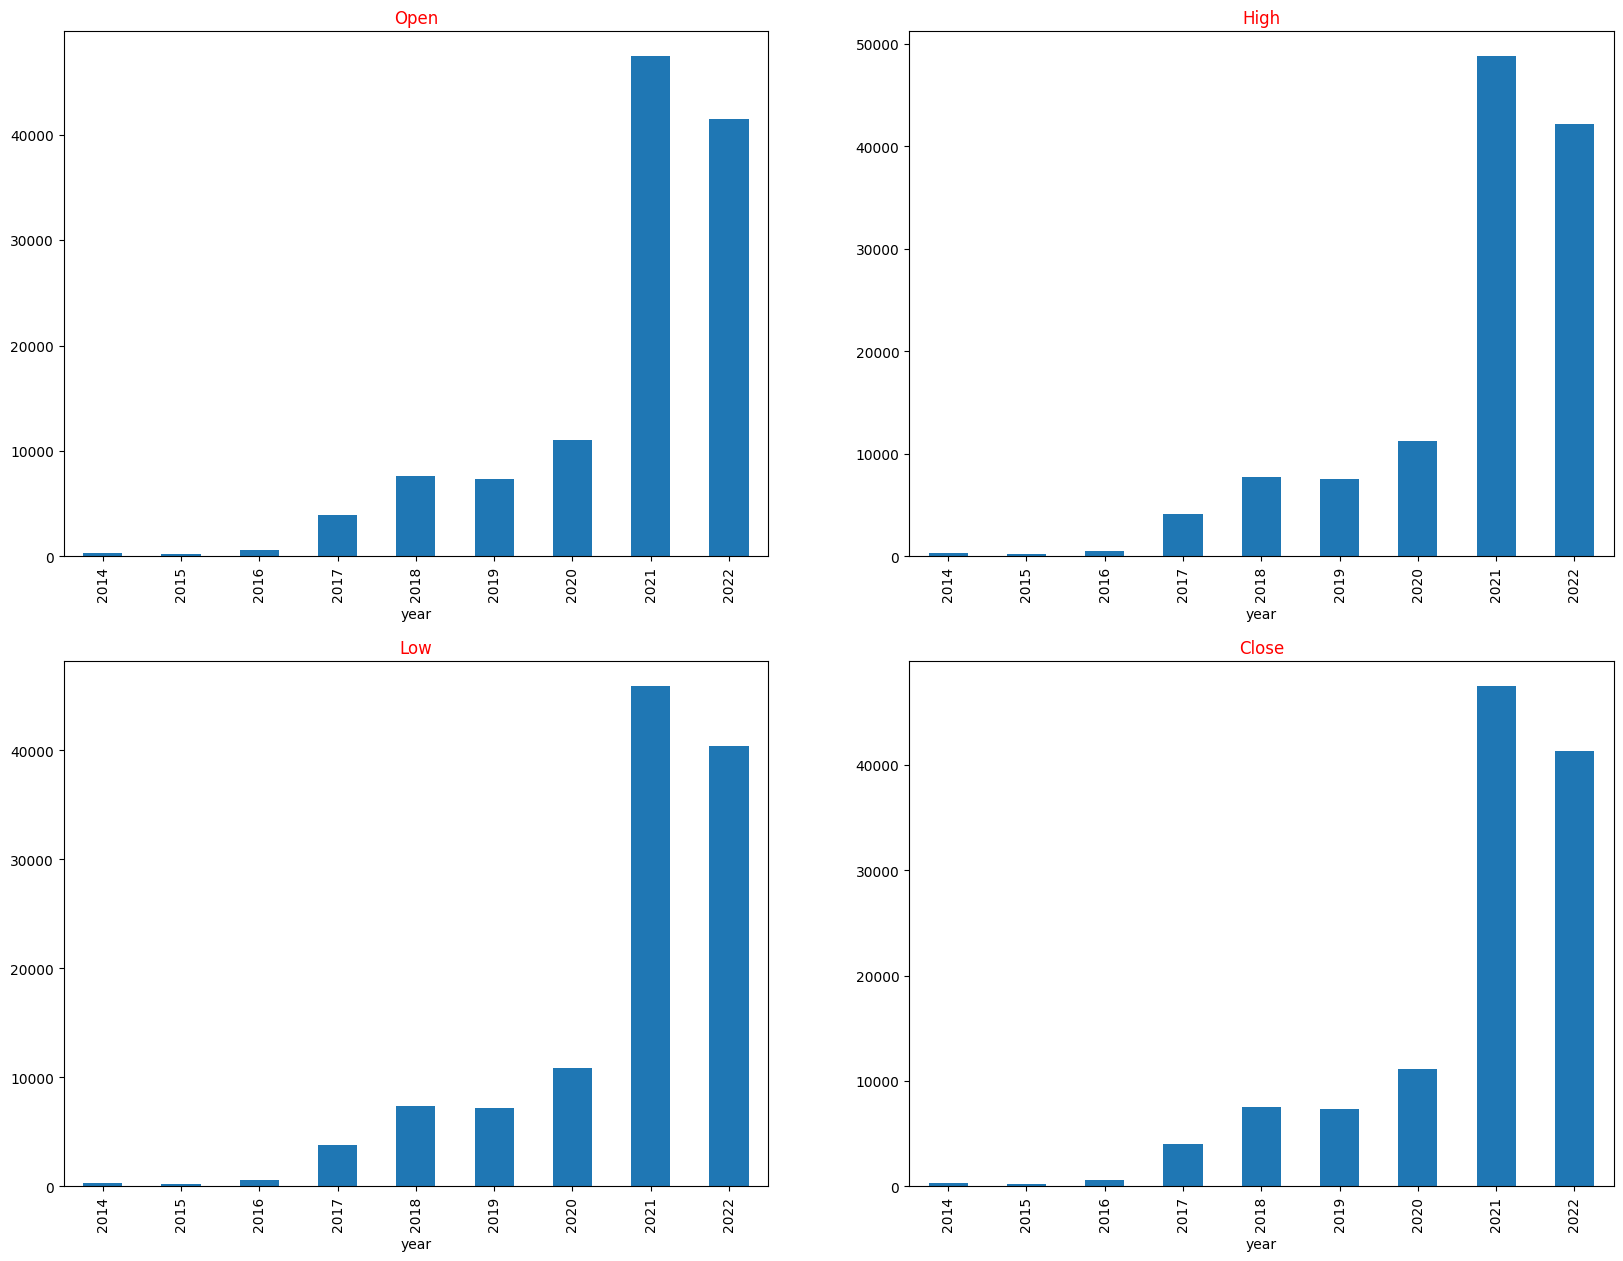

In [19]:
dg = df.groupby('year').mean()
plt.subplots(figsize=(20,15))
for i, col in enumerate(['Open','High','Low','Close']):
    plt.subplot(2,2,i+1)
    dg[col].plot.bar()
    plt.title(col,color='red')
plt.show()

In [20]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.sample(5)

,Date,Open,High,Low,Close,Volume,year,month,day,is_quarter_end
2389,2021-04-02,59098.878906,60267.187500,58869.281250,59384.312500,58727860620,2021,4,2,0
564,2016-04-03,421.173004,421.579987,419.696991,420.903992,38053700,2016,4,3,0
228,2015-05-03,234.880005,243.240005,234.082993,240.358002,18494100,2015,5,3,0
261,2015-06-05,224.154007,225.968002,223.179001,224.951996,18056500,2015,6,5,1
2402,2021-04-15,63075.195313,63821.671875,62208.964844,63314.011719,60954381579,2021,4,15,0


In [21]:
df['Open-Close'] = df['Open'] - df['Close']  # price movement capture: bullish ya bearish.
df['Low-High'] = df['Low'] - df['High']      # It measure price volatility Low ya High
df['Target'] = np.where(df['Close'].shift(-1) > df['Close'],1,0) 
# If next day's close is higher than today's close, then target = 1 (buy signal), else 0 (no buy).

In [22]:
df.sample(5)

,Date,Open,High,Low,Close,Volume,year,month,day,is_quarter_end,Open-Close,Low-High,Target
1136,2017-10-27,5899.740234,5988.390137,5728.819824,5780.899902,1710130048,2017,10,27,0,118.840332,-259.570313,0
1618,2019-02-21,4000.256836,4010.009521,3940.108154,3954.118164,7775128102,2019,2,21,0,46.138672,-69.901367,1
1382,2018-06-30,6214.220215,6465.509766,6214.220215,6404.000000,4543860224,2018,6,30,1,-189.779785,-251.289551,0
2449,2021-06-01,37293.792969,37896.734375,35787.085938,36684.925781,34639423297,2021,6,1,1,608.867188,-2109.648437,1
1961,2020-01-30,9316.016602,9553.125977,9230.897461,9508.993164,32378792851,2020,1,30,0,-192.976562,-322.228516,0


### Above we have added some more columns which will help in the training of our model. We have added the target feature which is a signal whether to buy or not we will train our model to predict this only. But before proceeding let's check whether the target is balanced or not using a pie chart.

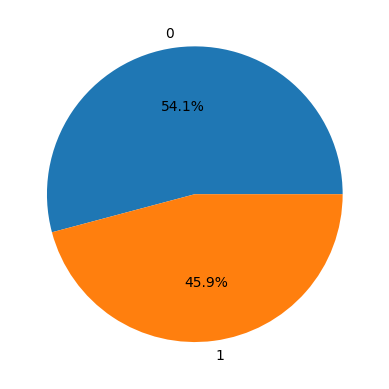

In [23]:
plt.pie(df['Target'].value_counts().values,labels=[0,1],autopct='%1.1f%%')
plt.show()

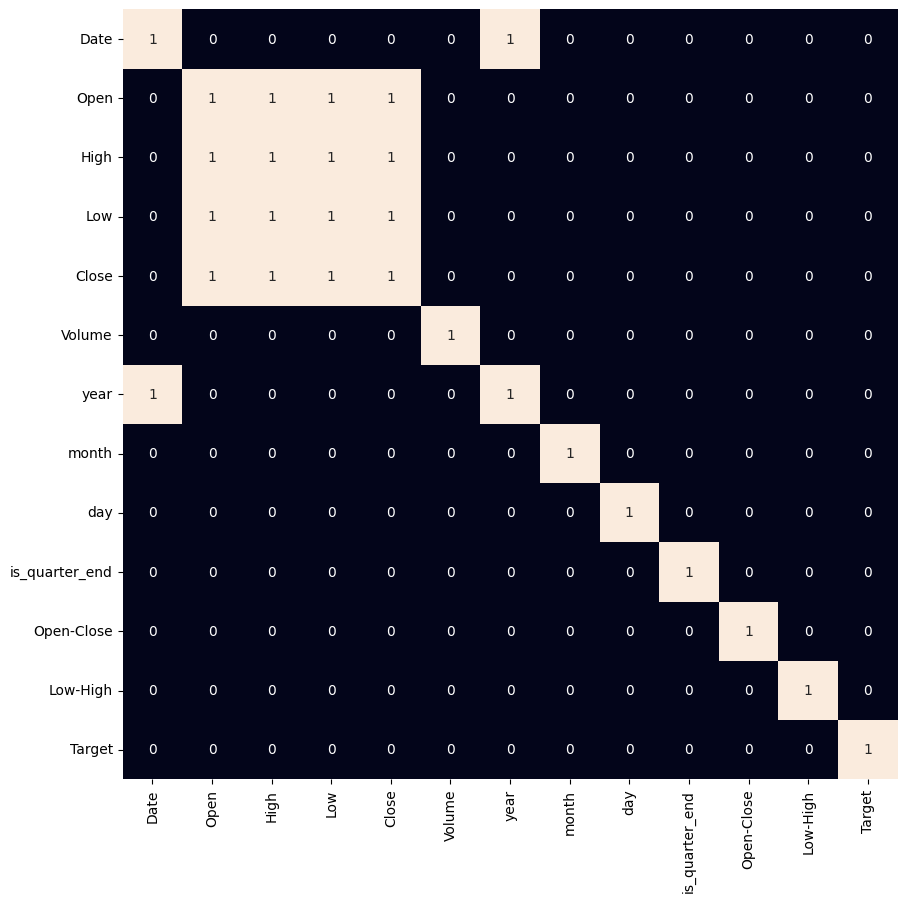

In [24]:
# Check the corellation between the data
plt.figure(figsize=(10,10))

sns.heatmap(df.corr()>0.9,annot=True, cbar=False)
plt.show()

### So the conclusion is, we can say that there is a high correlation between OHLC which is pretty obvious, and the added features are not highly correlated with each other or previously provided features which means that we are good to go and build our model.

In [25]:
df

,Date,Open,High,Low,Close,Volume,year,month,day,is_quarter_end,Open-Close,Low-High,Target
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17,1,8.529999,-15.752014,0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18,1,32.419983,-43.755981,0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19,1,29.307007,-43.302978,1
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20,1,-14.230988,-33.412994,0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21,1,9.263977,-19.244995,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2708,2022-02-15,42586.464844,44667.218750,42491.035156,44575.203125,22721659051,2022,2,15,0,-1988.738281,-2176.183594,0
2709,2022-02-16,44578.277344,44578.277344,43456.691406,43961.859375,19792547657,2022,2,16,0,616.417969,-1121.585938,0
2710,2022-02-17,43937.070313,44132.972656,40249.371094,40538.011719,26246662813,2022,2,17,0,3399.058594,-3883.601562,0
2711,2022-02-18,40552.132813,40929.152344,39637.617188,40030.976563,23310007704,2022,2,18,0,521.156250,-1291.535156,1


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Taking the target and the training data
x = df[['Open-Close','Low-High','is_quarter_end']]
y = df['Target']

# Scaling the training data
ss = StandardScaler()
x= ss.fit_transform(x)

# Train the data
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

# Model Development and Evaluation

* Now is the time to train some state-of-the-art machine learning models(Logistic Regression, Support Vector Machine, XGBClassifier), and then based on their performance on the training and validation data we will choose which ML model is serving the purpose at hand better.

* For the evaluation metric, we will use the ROC-AUC curve but why this is because instead of predicting the hard probability that is 0 or 1 we would like it to predict soft probabilities that are continuous values between 0 to 1. And with soft probabilities, the ROC-AUC curve is generally used to measure the accuracy of the predictions.

In [27]:
# Import the nacessary libraries best for the model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

In [28]:
models = [LogisticRegression(),SVC(kernel='poly',probability=True),XGBClassifier(
    n_estimators=100,           # Number of boosting rounds
    max_depth=3,                # Shallower trees to reduce complexity
    learning_rate=0.05,         # Slower learning to avoid overfitting
    subsample=0.7,              # Use 70% of rows per tree
    colsample_bytree=0.6,       # Use 60% of features per tree
    gamma=1,                    # Require minimum loss reduction to split
    min_child_weight=5,         # Minimum weight in leaf node
    scale_pos_weight=1,         # Class imbalance not severe
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)]

for i in range(3):
    models[i].fit(xtrain,ytrain)
    print(f'{models[i]} : ')
    print('Training Accuracy : ',metrics.roc_auc_score(ytrain,models[i].predict_proba(xtrain)[:,1]))
    print('Test Accuracy : ',metrics.roc_auc_score(ytest,models[i].predict_proba(xtest)[:,1]))
    print()
    

LogisticRegression() : 
Training Accuracy :  0.529203766574851
Test Accuracy :  0.5020782867209865

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.4678333653620311
Test Accuracy :  0.4702433384717022

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...) : 
Training Accuracy :  0.6383532

### Out of the three models we trained, XGBClassifier delivered the best performance on the training data. However, its significantly lower validation accuracy suggests overfitting — the model has learned the training data too well but struggles to generalize. In contrast, Logistic Regression shows more balanced performance across both training and validation sets, indicating better generalization.

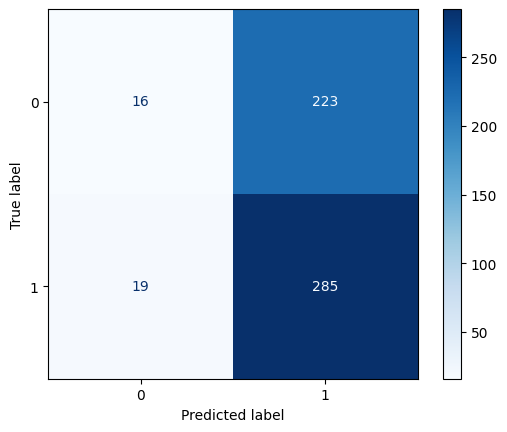

In [29]:
# Let's plot a confusion metrics
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(models[0], xtest,ytest , cmap='Blues')
plt.show()

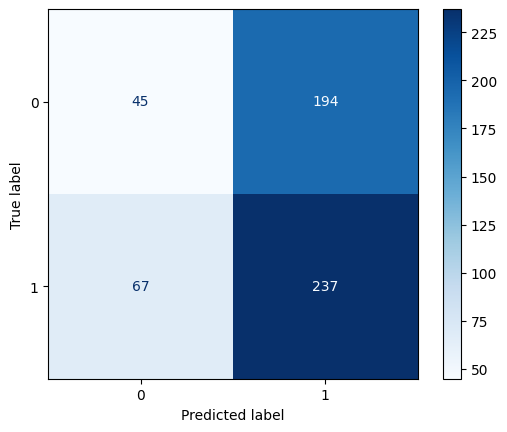

In [30]:
# Let's plot a confusion metrics
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(models[2], xtest,ytest , cmap='Blues')
plt.show()